<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Week 22 Lab</h1>
</div>

In [487]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise 1

We'd like to analyze the `SNAP_history_1969_2019.csv` dataset, however it's missing some data. Find the missing values. Fix incorrect entries as well.

Some helpful formulas:

$ \texttt{Total Costs} = \texttt{Total Benefits} + \texttt{Other Costs} $

$ \texttt{Total Benefits} = \texttt{Total Costs} - \texttt{Other Costs} $

$ \texttt{Other Costs} = \texttt{Total Costs} - \texttt{Total Benefits} $

$ \texttt{Average Participation} = \frac{\texttt{Total Benefits}}{\texttt{Average Benefits Per Person}}$

$ \texttt{Average Benefits Per Person} = \frac{\texttt{Total Benefits}}{\texttt{Average Participation}}$

$ \texttt{Total Benefits} = \texttt{Average Benefits Per Person} * \texttt{Average Participation}$

Note: `Average Participation` is in the thousands and all costs  are in the millions.

Hint: Think about how we can filter for specific columns that are null and apply a fix for those missing values.


In [488]:
# calling it s_df to not confuse it with the others 
# and because `snap_df` is too much to constantly write
s_df = pd.read_csv('../datasets/SNAP_history_1969_2019.csv')
s_df

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
0,1969,2878.0,6.63,228.80,21.70,250.50
1,1970,4340.0,10.55,549.70,27.20,576.90
2,1971,9368.0,13.55,1522.70,53.20,1575.90
3,1972,NaN,13.48,1797.30,69.40,NaN
4,1973,12166.0,14.60,2131.40,76.00,2207.40
5,1974,12862.0,17.61,2718.30,119.20,2837.50
6,1975,17064.0,21.40,4385.50,233.20,4618.70
7,1976,18549.0,NaN,5326.50,359.00,5685.50
8,1977,17077.0,24.71,5067.00,394.00,5461.00
9,1978,16001.0,26.77,5139.20,380.50,5519.70


In [489]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fiscal Year                 50 non-null     object 
 1   Average Participation       48 non-null     float64
 2   Average Benefit Per Person  48 non-null     float64
 3   Total Benefits(M)           50 non-null     float64
 4   Other Costs                 51 non-null     float64
 5   Total Costs(M)              48 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [490]:
s_df[s_df.isnull().any(axis=1)]

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
3,1972,NaN,13.48,1797.30,69.40,NaN
7,1976,18549.0,NaN,5326.50,359.00,5685.50
16,1985,19899.0,NaN,10743.60,959.60,11703.20
19,1988,18645.0,49.83,11149.10,1167.70,NaN
22,1991,NaN,63.78,17315.77,1431.50,18747.27
24,NaN,26987.0,67.95,22006.03,1646.94,23652.97
33,2002,19096.0,79.67,NaN,2380.82,20637.02
36,2005,25628.0,92.89,28567.88,2504.13,NaN
38,2007,26316.0,NaN,30373.27,2800.25,33173.52
45,2014,NaN,125.01,69998.84,4061.49,74060.33


In [491]:
# s_df= s_df.fillna(0)

In [492]:
s_df[s_df.isnull().any(axis=1)]

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
3,1972,NaN,13.48,1797.30,69.40,NaN
7,1976,18549.0,NaN,5326.50,359.00,5685.50
16,1985,19899.0,NaN,10743.60,959.60,11703.20
19,1988,18645.0,49.83,11149.10,1167.70,NaN
22,1991,NaN,63.78,17315.77,1431.50,18747.27
24,NaN,26987.0,67.95,22006.03,1646.94,23652.97
33,2002,19096.0,79.67,NaN,2380.82,20637.02
36,2005,25628.0,92.89,28567.88,2504.13,NaN
38,2007,26316.0,NaN,30373.27,2800.25,33173.52
45,2014,NaN,125.01,69998.84,4061.49,74060.33


In [493]:
# s_df["Total Costs(M)"] = (s_df["Total Benefits(M)"] + s_df["Other Costs"])
s_df["Total Costs(M)"] = s_df["Total Costs(M)"].fillna((s_df["Total Benefits(M)"] + s_df["Other Costs"]))
s_df

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
0,1969,2878.0,6.63,228.80,21.70,250.50
1,1970,4340.0,10.55,549.70,27.20,576.90
2,1971,9368.0,13.55,1522.70,53.20,1575.90
3,1972,NaN,13.48,1797.30,69.40,1866.70
4,1973,12166.0,14.60,2131.40,76.00,2207.40
5,1974,12862.0,17.61,2718.30,119.20,2837.50
6,1975,17064.0,21.40,4385.50,233.20,4618.70
7,1976,18549.0,NaN,5326.50,359.00,5685.50
8,1977,17077.0,24.71,5067.00,394.00,5461.00
9,1978,16001.0,26.77,5139.20,380.50,5519.70


In [494]:
s_df["Total Benefits(M)"] = (s_df["Total Costs(M)"] - s_df["Other Costs"])
s_df


,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
0,1969,2878.0,6.63,228.80,21.70,250.50
1,1970,4340.0,10.55,549.70,27.20,576.90
2,1971,9368.0,13.55,1522.70,53.20,1575.90
3,1972,NaN,13.48,1797.30,69.40,1866.70
4,1973,12166.0,14.60,2131.40,76.00,2207.40
5,1974,12862.0,17.61,2718.30,119.20,2837.50
6,1975,17064.0,21.40,4385.50,233.20,4618.70
7,1976,18549.0,NaN,5326.50,359.00,5685.50
8,1977,17077.0,24.71,5067.00,394.00,5461.00
9,1978,16001.0,26.77,5139.20,380.50,5519.70


In [495]:
s_df["Other Costs"] = (s_df["Total Costs(M)"] - s_df["Total Benefits(M)"])
s_df


,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
0,1969,2878.0,6.63,228.80,21.70,250.50
1,1970,4340.0,10.55,549.70,27.20,576.90
2,1971,9368.0,13.55,1522.70,53.20,1575.90
3,1972,NaN,13.48,1797.30,69.40,1866.70
4,1973,12166.0,14.60,2131.40,76.00,2207.40
5,1974,12862.0,17.61,2718.30,119.20,2837.50
6,1975,17064.0,21.40,4385.50,233.20,4618.70
7,1976,18549.0,NaN,5326.50,359.00,5685.50
8,1977,17077.0,24.71,5067.00,394.00,5461.00
9,1978,16001.0,26.77,5139.20,380.50,5519.70


In [496]:
s_df["Average Participation"] = s_df["Average Participation"].fillna(((s_df["Total Benefits(M)"] * 1000) / s_df["Average Benefit Per Person"]).round(1))
s_df[:8]

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
0,1969,2878.0,6.63,228.8,21.7,250.5
1,1970,4340.0,10.55,549.7,27.2,576.9
2,1971,9368.0,13.55,1522.7,53.2,1575.9
3,1972,133330.9,13.48,1797.3,69.4,1866.7
4,1973,12166.0,14.60,2131.4,76.0,2207.4
5,1974,12862.0,17.61,2718.3,119.2,2837.5
6,1975,17064.0,21.40,4385.5,233.2,4618.7
7,1976,18549.0,NaN,5326.5,359.0,5685.5


In [497]:
# s_df["Average Benefit Per Person"] = (s_df["Total Benefits(M)"]*1000 / s_df["Average Participation"]).round(2)
s_df["Average Benefit Per Person"] = s_df["Average Benefit Per Person"].fillna(((s_df["Total Benefits(M)"] * 1000) / s_df["Average Participation"]).round(2))
s_df[:8]

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
0,1969,2878.0,6.63,228.8,21.7,250.5
1,1970,4340.0,10.55,549.7,27.2,576.9
2,1971,9368.0,13.55,1522.7,53.2,1575.9
3,1972,133330.9,13.48,1797.3,69.4,1866.7
4,1973,12166.0,14.60,2131.4,76.0,2207.4
5,1974,12862.0,17.61,2718.3,119.2,2837.5
6,1975,17064.0,21.40,4385.5,233.2,4618.7
7,1976,18549.0,287.16,5326.5,359.0,5685.5


In [498]:
s_df["Average Benefit Per Person"] = s_df["Average Benefit Per Person"].fillna(((s_df["Total Benefits(M)"] * 1000) / s_df["Average Participation"]).round(2))

In [499]:
s_df[:8]

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
0,1969,2878.0,6.63,228.8,21.7,250.5
1,1970,4340.0,10.55,549.7,27.2,576.9
2,1971,9368.0,13.55,1522.7,53.2,1575.9
3,1972,133330.9,13.48,1797.3,69.4,1866.7
4,1973,12166.0,14.60,2131.4,76.0,2207.4
5,1974,12862.0,17.61,2718.3,119.2,2837.5
6,1975,17064.0,21.40,4385.5,233.2,4618.7
7,1976,18549.0,287.16,5326.5,359.0,5685.5


In [504]:
s_df["Fiscal Year"] = range(1969, 1969+len(s_df))

In [505]:
s_df

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
0,1969,2878.0,6.63,228.80,21.70,250.50
1,1970,4340.0,10.55,549.70,27.20,576.90
2,1971,9368.0,13.55,1522.70,53.20,1575.90
3,1972,133330.9,13.48,1797.30,69.40,1866.70
4,1973,12166.0,14.60,2131.40,76.00,2207.40
5,1974,12862.0,17.61,2718.30,119.20,2837.50
6,1975,17064.0,21.40,4385.50,233.20,4618.70
7,1976,18549.0,287.16,5326.50,359.00,5685.50
8,1977,17077.0,24.71,5067.00,394.00,5461.00
9,1978,16001.0,26.77,5139.20,380.50,5519.70


# Exercise 2

We'd like to do some analysis on our `grades.csv` dataset.

Using the following dataframe, do some exploratory analysis and then plot, at least, one chart using matplotlib or seaborn (with title, axes labeled and anything else that would make it look professional).

Hint: 
We've seen how to plot box plots, scatter plots, line charts, bar charts, histograms and even more complicated charts like heatmaps of the correlations. Refer to your notes and try to come up with a useful chart that demonstrates a relationship we might like to explore.


In [502]:
# calling it g_df to not confuse it with the others 
# and because `grades_df` is too much to constantly write
g_df = pd.read_csv('../datasets/grades.csv')
g_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [553]:
gender_grades = g_df.groupby("gender")[["math score", "writing score", "reading score"]].mean().round(0)
gender_grades


,math score,writing score,reading score
gender,,,
female,64.0,72.0,73.0
male,69.0,63.0,65.0


Text(0.5, 0, 'Average scores')

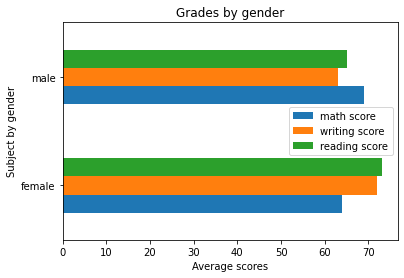

In [551]:
gender_grades.plot.barh()
plt.title("Grades by gender")
plt.ylabel("Subject by gender")
plt.xlabel("Average scores")

# Exercise 3

Exercise 3 was a logistic regression on the Titanic dataset. It will be given as a guided project instead.